In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
%matplotlib inline

In [2]:
all_data = pd.read_csv('./Tsmc_split.csv')
all_data['log_ret'] = np.log(all_data['Close']/ all_data['Close'].shift(1))
scaler = MinMaxScaler(feature_range = (0, 1))
target_data = scaler.fit_transform(all_data.iloc[: 724, 3].values.reshape(-1, 1)).reshape(-1, )
train_x = []
train_y = []
wavelet_transform_x = []
for i in range(35, target_data.shape[0]):
    x = target_data[i - 35: i - 5]
    y = target_data[i]
    (ca, cd) = pywt.dwt(x, 'db4')
    caT = pywt.threshold(ca, np.std(ca), mode = 'soft')
    cdT = pywt.threshold(cd, np.std(cd), mode = 'soft')
    tx = pywt.idwt(caT, cdT, 'db4')
    train_x.append(x)
    wavelet_transform_x.append(tx)
    train_y.append(y)
train_x = np.array(train_x)
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], 1)
wavelet_transform_x = np.array(wavelet_transform_x)
wavelet_transform_x = wavelet_transform_x.reshape(wavelet_transform_x.shape[0], wavelet_transform_x.shape[1], 1)
train_y = np.array(train_y)

In [3]:
wavelet_transform_x.shape

(689, 30, 1)

In [50]:
target_data = scaler.transform(all_data.iloc[724: 1000, 3].values.reshape(-1, 1)).reshape(-1, )
test_x = []
test_y = []
wavelet_transform_test_x = []
for i in range(35, target_data.shape[0]):
    x = target_data[i - 35: i - 5]
    y = target_data[i]
    (ca, cd) = pywt.dwt(x, 'db4')
    caT = pywt.threshold(ca, np.std(ca), mode = 'soft')
    cdT = pywt.threshold(cd, np.std(cd), mode = 'soft')
    tx = pywt.idwt(caT, cdT, 'db4')
    test_x.append(x)
    wavelet_transform_test_x.append(tx)
    test_y.append(y)
test_x = np.array(test_x)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], 1)
wavelet_transform_test_x = np.array(wavelet_transform_test_x)
wavelet_transform_test_x = wavelet_transform_test_x.reshape(wavelet_transform_test_x.shape[0], wavelet_transform_test_x.shape[1], 1)
test_y = np.array(test_y)


In [51]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (30, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(train_x, train_y, epochs = 25, batch_size = 32)
predict_y = model.predict(test_x)

Epoch 1/25
22/22 [==============================] - 5s 32ms/step - loss: 0.0463
Epoch 2/25
22/22 [==============================] - 1s 30ms/step - loss: 0.0139
Epoch 3/25
22/22 [==============================] - 1s 29ms/step - loss: 0.0104
Epoch 4/25
22/22 [==============================] - 1s 30ms/step - loss: 0.0107
Epoch 5/25
22/22 [==============================] - 1s 30ms/step - loss: 0.0097
Epoch 6/25
22/22 [==============================] - 1s 30ms/step - loss: 0.0098
Epoch 7/25
22/22 [==============================] - 1s 30ms/step - loss: 0.0096
Epoch 8/25
22/22 [==============================] - 1s 30ms/step - loss: 0.0098
Epoch 9/25
22/22 [==============================] - 1s 30ms/step - loss: 0.0095
Epoch 10/25
22/22 [==============================] - 1s 30ms/step - loss: 0.0101
Epoch 11/25
22/22 [==============================] - 1s 34ms/step - loss: 0.0095
Epoch 12/25
22/22 [==============================] - 1s 30ms/step - loss: 0.0097
Epoch 13/25
22/22 [==================

Text(0.5, 1.0, 'Wavelet Transform data')

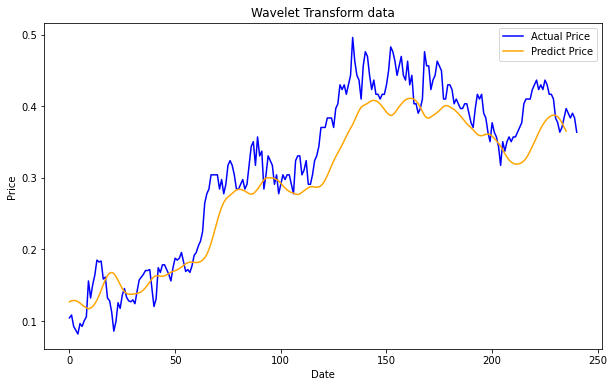

In [52]:
plt.figure(figsize = (10, 6))
plt.plot(test_y, color = 'blue', label = 'Actual Price')
plt.plot(predict_y[5:], color = 'orange', label = 'Predict Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc = 'upper right')
plt.title('Wavelet Transform data')

Text(0.5, 1.0, 'Original data')

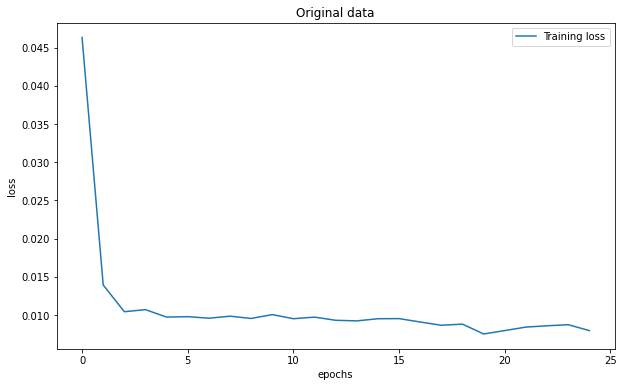

In [53]:
epochs = range(len(history.history['loss']))
plt.figure(figsize = (10, 6))
plt.plot(epochs, history.history['loss'], label = 'Training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc = 'upper right')
plt.title('Original data')

In [54]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (30, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(wavelet_transform_x, train_y, epochs = 25, batch_size = 32)
predict_y = model.predict(wavelet_transform_test_x)

Epoch 1/25
22/22 [==============================] - 5s 39ms/step - loss: 0.0489
Epoch 2/25
22/22 [==============================] - 1s 36ms/step - loss: 0.0139
Epoch 3/25
22/22 [==============================] - 1s 38ms/step - loss: 0.0116
Epoch 4/25
22/22 [==============================] - 1s 38ms/step - loss: 0.0124
Epoch 5/25
22/22 [==============================] - 1s 38ms/step - loss: 0.0110
Epoch 6/25
22/22 [==============================] - 1s 38ms/step - loss: 0.0110
Epoch 7/25
22/22 [==============================] - 1s 39ms/step - loss: 0.0111
Epoch 8/25
22/22 [==============================] - 1s 40ms/step - loss: 0.0100
Epoch 9/25
22/22 [==============================] - 1s 40ms/step - loss: 0.0102
Epoch 10/25
22/22 [==============================] - 1s 38ms/step - loss: 0.0099
Epoch 11/25
22/22 [==============================] - 1s 38ms/step - loss: 0.0106
Epoch 12/25
22/22 [==============================] - 1s 39ms/step - loss: 0.0109
Epoch 13/25
22/22 [==================

Text(0.5, 1.0, 'Original data')

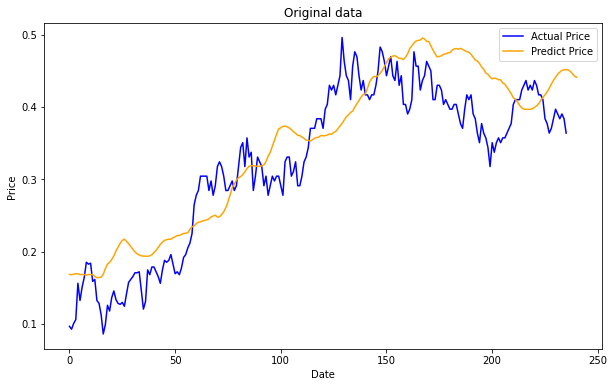

In [55]:
plt.figure(figsize = (10, 6))
plt.plot(test_y[5:], color = 'blue', label = 'Actual Price')
plt.plot(predict_y, color = 'orange', label = 'Predict Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc = 'upper right')
plt.title('Original data')

Text(0.5, 1.0, 'Wavelet Transform data')

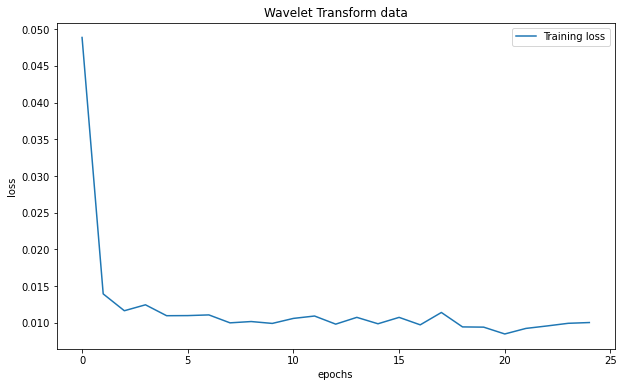

In [56]:
epochs = range(len(history.history['loss']))
plt.figure(figsize = (10, 6))
plt.plot(epochs, history.history['loss'], label = 'Training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc = 'upper right')
plt.title('Wavelet Transform data')

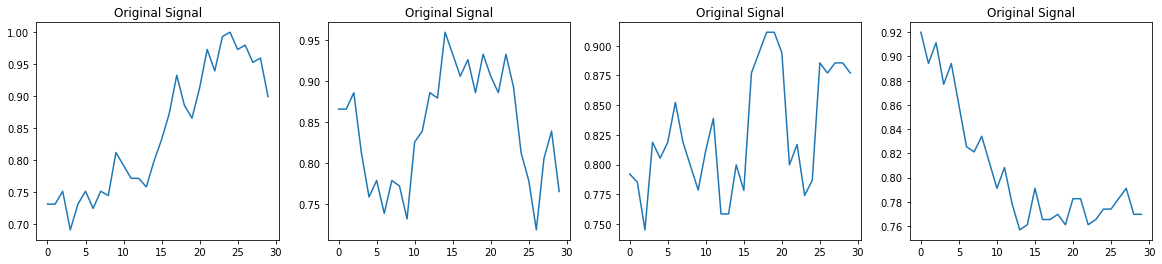

In [57]:
plt.figure(figsize = (20, 4)).subplots(1, 4)
plt.title('Original Signal')
plt.subplot(1, 4, 1)
plt.plot(train_x[0])
plt.title('Original Signal')
plt.subplot(1, 4, 2)
plt.plot(train_x[40])
plt.title('Original Signal')
plt.subplot(1, 4, 3)
plt.plot(train_x[70])
plt.title('Original Signal')
plt.subplot(1, 4, 4)
plt.plot(train_x[100])

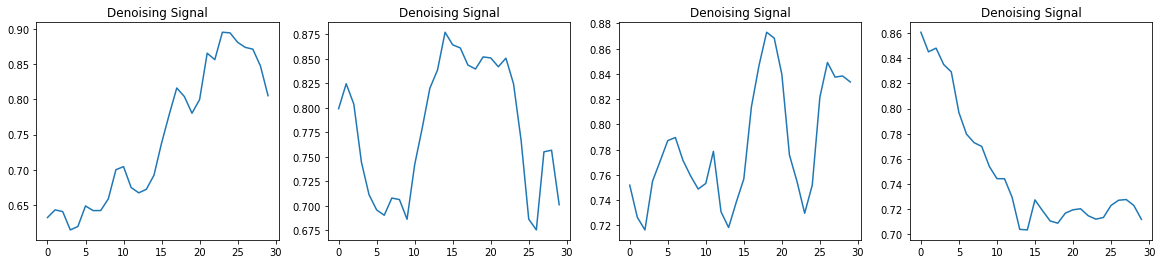

In [58]:
plt.figure(figsize = (20, 4)).subplots(1, 4)
plt.title('Denoising Signal')
plt.subplot(1, 4, 1)
plt.plot(wavelet_transform_x[0])
plt.title('Denoising Signal')
plt.subplot(1, 4, 2)
plt.plot(wavelet_transform_x[40])
plt.title('Denoising Signal')
plt.subplot(1, 4, 3)
plt.plot(wavelet_transform_x[70])
plt.title('Denoising Signal')
plt.subplot(1, 4, 4)
plt.plot(wavelet_transform_x[100])

In [59]:
pip list

Package                       Version
----------------------------- -----------
absl-py                       1.0.0
alabaster                     0.7.12
anyio                         3.4.0
argon2-cffi                   21.1.0
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.2.0
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.10.0
bleach                        4.1.0
boltons                       21.0.0
cachetools                    4.2.4
certifi                       2021.10.8
cffi                          1.15.0
charset-normalizer            2.0.7
click                         8.0.3
colorama                      0.4.4
cycler                        0.11.0
Cython                        0.29.26
dataframe                     0.2.1.3
debugpy                       1.5.1
decorator                     5.1.0
defusedxml                    0.7.1
Django                        1.5.11
dnsp

You should consider upgrading via the 'C:\Python\python.exe -m pip install --upgrade pip' command.


requests-oauthlib             1.3.0
rsa                           4.7.2
scikit-image                  0.19.1
scikit-learn                  1.0.1
scipy                         1.7.3
seaborn                       0.11.2
Send2Trash                    1.8.0
setuptools                    60.1.0
setuptools-scm                6.3.2
sgmllib3k                     1.0.0
six                           1.16.0
smmap                         5.0.0
sniffio                       1.2.0
snowballstemmer               2.2.0
soupsieve                     2.3.1
sourcedefender                7.1.61
Sphinx                        4.3.1
sphinxcontrib-applehelp       1.0.2
sphinxcontrib-devhelp         1.0.2
sphinxcontrib-htmlhelp        2.0.0
sphinxcontrib-jsmath          1.0.1
sphinxcontrib-qthelp          1.0.3
sphinxcontrib-serializinghtml 1.1.5
statsmodels                   0.13.1
sweetviz                      2.1.3
tabulate                      0.8.9
tenacity                      8.0.1
tensorboard           